## Описание проекта



Заказчик этого исследования — Министерство культуры Российской Федерации. 
Необходимо изучить рынок российского кинопроката и выявить текущие тренды. В датафрейме есть фильмы, которые получили государственную поддержку. Нужно ответить на вопрос, насколько такие фильмы интересны зрителю. 
Данные, с которыми предстоит работать, опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Импортировала все, предположительно, необходимые библиотеки.

In [2]:
df1 = pd.read_csv('/datasets/mkrf_movies.csv')
df1.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер"


Таблица df1 содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Столбец **budget** уже включает в себя полный объём государственной поддержки. Данные в этом столбце указаны только для тех фильмов, которые получили государственную поддержку.  Информация в таблице:
<br>
<br>**title** — название фильма;
<br>**puNumber** — номер прокатного удостоверения;
<br>**show_start_date** — дата премьеры фильма;
<br>**type** — тип фильма;
<br>**film_studio** — студия-производитель;
<br>**production_country** — страна-производитель;
<br>**director** — режиссёр;
<br>**producer** — продюсер;
<br>**age_restriction** — возрастная категория;
<br>**refundable_support** — объём возвратных средств государственной поддержки;
<br>**nonrefundable_support** — объём невозвратных средств государственной поддержки;
<br>**financing_source** — источник государственного финансирования;
<br>**budget** — общий бюджет фильма;
<br>**ratings** — рейтинг фильма на КиноПоиске;
<br>**genres** — жанр фильма.

In [3]:
df2 = pd.read_csv('/datasets/mkrf_shows.csv')
df2.head(3)

,puNumber,box_office
0,111000113,2450.0
1,111000115,61040.0
2,111000116,153030013.4


Таблица df2 содержит сведения о показах фильмов в российских кинотеатрах.
<br>
<br>**puNumber** — номер прокатного удостоверения;
<br>**box_office** — сборы в рублях.

Необходимо объединить два датафрема, общий столбец для этого puNumber. Однако предварительно нужно убедиться, что в обоих датафреймах данные одного типа. 

In [4]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7486 non-null   object 
 1   puNumber               7486 non-null   object 
 2   show_start_date        7486 non-null   object 
 3   type                   7486 non-null   object 
 4   film_studio            7468 non-null   object 
 5   production_country     7484 non-null   object 
 6   director               7477 non-null   object 
 7   producer               6918 non-null   object 
 8   age_restriction        7486 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

Значения puNumber в первом датафрейме представлены в виде строки.

In [5]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   puNumber    3158 non-null   int64  
 1   box_office  3158 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Значения puNumber во втором датафрейме представлены в целочисленном формате. Считаю этот формат более подходящим для работы со значениями, так что изменим тип данных в первом датафрейме.

При попытке изменить тип данных получила ошибку "invalid literal for int() with base 10: 'нет'", т.е. номер прокатного удостоверения отсутствует. Ситаю корректным удалить такие строки.

In [6]:
df1 = df1.query('puNumber != "нет"')
df1['puNumber'] = df1['puNumber'].astype('int')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7485
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
dtypes: f

In [8]:
movies = df1.merge(df2, on='puNumber', how='left')
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

Теперь датафрейм готов к предобработке. 

## Предобработка данных

Изучим общую информацию о датафрейме

In [9]:
movies.head(3)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,7.2,"боевик,драма,мелодрама",NaN
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,NaN,NaN,NaN,NaN,6.6,"драма,военный",NaN
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,NaN,NaN,NaN,NaN,6.8,"фантастика,боевик,триллер",NaN


In [10]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   title                  7485 non-null   object 
 1   puNumber               7485 non-null   int64  
 2   show_start_date        7485 non-null   object 
 3   type                   7485 non-null   object 
 4   film_studio            7467 non-null   object 
 5   production_country     7483 non-null   object 
 6   director               7476 non-null   object 
 7   producer               6917 non-null   object 
 8   age_restriction        7485 non-null   object 
 9   refundable_support     332 non-null    float64
 10  nonrefundable_support  332 non-null    float64
 11  budget                 332 non-null    float64
 12  financing_source       332 non-null    object 
 13  ratings                6519 non-null   object 
 14  genres                 6510 non-null   object 
 15  box_

**Номер прокатного удостоверения**

Тип данных уже исправлен. Поменяем название столбца.

In [11]:
movies = movies.rename(columns = {'puNumber' : 'pu_number'})

**Дата премьеры фильма**

In [12]:
movies['show_start_date'] = pd.to_datetime(movies['show_start_date'], format = '%Y-%m-%dT%H:%M:%S')

**Рейтинг фильма на КиноПоиске**

В первую очередь нужно проверить, почему в столбце с ретингом, где должны быть дробные значения (по общепринятому стандарту и стандарту КиноПоиска), строковый формат, хотя при просмотре нескольких строк датафрейма можно было наблюдать именно дроби. После исправления заменим тип данных. 

In [13]:
movies['ratings'].unique()

array(['7.2', '6.6', '6.8', '7.7', '8.3', '8.0', '7.8', '8.1', '7.1',
       '6.0', '7.4', '5.8', '8.7', '6.3', '6.9', '5.0', '4.3', '7.3',
       '7.0', '6.4', nan, '8.2', '7.5', '6.7', '7.9', '5.9', '6.2', '5.6',
       '6.5', '2.4', '7.6', '6.1', '8.6', '8.5', '8.8', '5.5', '5.1',
       '5.7', '5.4', '99%', '4.4', '4.5', '5.3', '4.1', '8.4', '2.6',
       '3.8', '4.6', '4.8', '4.0', '3.0', '1.6', '4.2', '5.2', '4.7',
       '4.9', '3.9', '2.7', '3.3', '2.9', '28%', '3.7', '1.4', '3.1',
       '97%', '3.5', '3.2', '2.8', '1.5', '2.1', '2.5', '9.2', '3.4',
       '1.1', '3.6', '83%', '64%', '91%', '94%', '62%', '79%', '90%',
       '19%', '88%', '1.0', '89%', '1.3', '1.9', '1.8', '1.2', '1.7',
       '9.0', '98%', '8.9', '9.1'], dtype=object)

Скорее всего произошел сбой при выгрузке данных — дробные занчения были умножены на 100%. Уберем знак процента и разделим каждое такое значение на 100. 

In [14]:
movies['ratings'] = movies['ratings'].str.replace('%', '')
movies['ratings'] = movies['ratings'].astype('float')
movies['ratings'].unique()

array([ 7.2,  6.6,  6.8,  7.7,  8.3,  8. ,  7.8,  8.1,  7.1,  6. ,  7.4,
        5.8,  8.7,  6.3,  6.9,  5. ,  4.3,  7.3,  7. ,  6.4,  nan,  8.2,
        7.5,  6.7,  7.9,  5.9,  6.2,  5.6,  6.5,  2.4,  7.6,  6.1,  8.6,
        8.5,  8.8,  5.5,  5.1,  5.7,  5.4, 99. ,  4.4,  4.5,  5.3,  4.1,
        8.4,  2.6,  3.8,  4.6,  4.8,  4. ,  3. ,  1.6,  4.2,  5.2,  4.7,
        4.9,  3.9,  2.7,  3.3,  2.9, 28. ,  3.7,  1.4,  3.1, 97. ,  3.5,
        3.2,  2.8,  1.5,  2.1,  2.5,  9.2,  3.4,  1.1,  3.6, 83. , 64. ,
       91. , 94. , 62. , 79. , 90. , 19. , 88. ,  1. , 89. ,  1.3,  1.9,
        1.8,  1.2,  1.7,  9. , 98. ,  8.9,  9.1])

In [15]:
movies.loc[movies['ratings'] > 10.0, 'ratings'] = movies['ratings'] / 10
movies['ratings'].unique()

array([7.2, 6.6, 6.8, 7.7, 8.3, 8. , 7.8, 8.1, 7.1, 6. , 7.4, 5.8, 8.7,
       6.3, 6.9, 5. , 4.3, 7.3, 7. , 6.4, nan, 8.2, 7.5, 6.7, 7.9, 5.9,
       6.2, 5.6, 6.5, 2.4, 7.6, 6.1, 8.6, 8.5, 8.8, 5.5, 5.1, 5.7, 5.4,
       9.9, 4.4, 4.5, 5.3, 4.1, 8.4, 2.6, 3.8, 4.6, 4.8, 4. , 3. , 1.6,
       4.2, 5.2, 4.7, 4.9, 3.9, 2.7, 3.3, 2.9, 2.8, 3.7, 1.4, 3.1, 9.7,
       3.5, 3.2, 1.5, 2.1, 2.5, 9.2, 3.4, 1.1, 3.6, 9.1, 9.4, 9. , 1.9,
       1. , 8.9, 1.3, 1.8, 1.2, 1.7, 9.8])

**Теперь имеем датафрейм со следующими типами данных:**

In [16]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7485 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7485 non-null   object             
 1   pu_number              7485 non-null   int64              
 2   show_start_date        7485 non-null   datetime64[ns, UTC]
 3   type                   7485 non-null   object             
 4   film_studio            7467 non-null   object             
 5   production_country     7483 non-null   object             
 6   director               7476 non-null   object             
 7   producer               6917 non-null   object             
 8   age_restriction        7485 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Были изменены типы данных в столбцах с номерами прокатных удостоверений, датами премьеры фильма и рейтингом фильма**

Изучим пропуски в датафрейме.

In [17]:
movies.isna().sum()

title                       0
pu_number                   0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7153
nonrefundable_support    7153
budget                   7153
financing_source         7153
ratings                   966
genres                    975
box_office               4327
dtype: int64

Проверим количество пропусков в процентном соотношении.

In [18]:
pd.DataFrame(round(
    (movies.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.240000
production_country,0.030000
director,0.120000
producer,7.590000
age_restriction,0.000000
refundable_support,95.560000


Всё, что окрашено ярко-синим считаем незначительным кол-вом пропуском и доспустимым для работы с данными, либо для удаления данных пропусков. 

Светло-синие пропуски попробуем заполнить там, где это возможно и целесообразно. Удалению не подлежат, т.к.имеют значительную долю от общего числа данных.

Наблюдаю значительное кол-во пропусков в данных (больше половины и почти 100%), связанных с деньгами:

<br>— объём возвратных средств государственной поддержки;
<br>— объём невозвратных средств государственной поддержки;
<br>— общий бюджет фильма;

Т.к. в столбце с данными об источнике финансирования ровно то же кол-во пропусков, что и в данных, перечисленных выше, могу сделать предположение, что эти фильмы не финансировались гос-вом. Пропуски заполнять не имеет смысла. Вероятно, что часть тех же фильмов и не располагает информацией о сборах в рублях, либо информация о сборах не была опубликована на сайте КиноПоиск. Вычислить эти данные не получится, вручную собирать в интернете невозможно в рамках данного проекта, так что оставляю пропуски как есть. 

Пропуски в названии студии-производителя, страны-производителя и режиссера составляют очень малую долю от общего кол-ва строк. Удалим эти строки.

In [19]:
movies = movies.dropna(subset = ['film_studio'])
movies = movies.dropna(subset = ['production_country'])
movies = movies.dropna(subset = ['director'])

Т.к. данные о продюссере, рейтинге и жанре не нужны для проверки гипотез, стоящих задачей данного проекта, заменять пропуски не имеет смысла + это можно сделать либо вручную (продюссер и жанр), либо медианой для рейтинга, группируя фильмы по жанру и году выхода, однако не считаю, что такое решение будет корректным. Удалять не буду, т.к. сами строки имеют ценность.

Проверим кол-во пропусков после обработки:

In [20]:
pd.DataFrame(round(
    (movies.isna().mean()*100),2)).style.background_gradient('coolwarm')

,0
title,0.000000
pu_number,0.000000
show_start_date,0.000000
type,0.000000
film_studio,0.000000
production_country,0.000000
director,0.000000
producer,7.560000
age_restriction,0.000000
refundable_support,95.550000


**Удалось избавиться от пропусков методом удаления строк в столбцах: студия-производитель, страна-производитель, режиссер. Причиной для удаления данных пропусков послужило их небольшое кол-во (менее 1% от общего массива данных). Остальные пропуски остались как есть, т.к. их либо невозможно заполнить, располагая лишь имеющимися данными, либо некорректно будет заполнить на основе имеющихся данных. Удаление строк было невозможно по причине того, что их большое кол-во, мы рисковали потерять слишком много данных.**

Посмотрим, есть ли дубликаты в данных.

In [21]:
movies['title'].value_counts()

День святого Валентина_                5
Лузеры                                 4
Дорога /По новелле Кормака МкКарфи/    4
Код доступа "Кейптаун"                 4
Безумцы                                4
                                      ..
Конверт                                1
Праздничный переполох                  1
Виолет и Дейзи                         1
Каникулы Президента                    1
Память крови                           1
Name: title, Length: 6745, dtype: int64

Избавимся от неявных дубликатов в названии фильмов, чтобы проверка на явные дубликаты дала более точный результат. Приведем все навзания в нижний регистр и лишние уберем пробелы в начале + уберем двойные пробелы, т.к. это довольно частые ошибки в строках, но которые зрительно отследить сложно. Также уберем нижние подчеркивания и разные вариации пробелов с ними, точки в конце строки оставим, т.к. они могут быть реальнми знаками препинания в названии фильма.

In [22]:
movies['title'] = movies['title'].str.lower().str.strip().replace('  ', '')
movies['title'] = movies['title'].str.replace('_', '')
movies['title'] = movies['title'].str.replace('__', '')
movies['title'] = movies['title'].str.replace(' _', '')
movies['title'] = movies['title'].str.replace('_ ', '')
movies['title'] = movies['title'].str.replace(' _ ', '')

movies['title'].value_counts()

доброе утро                                                                           5
день святого валентина                                                                5
гарри поттер и дары смерти - часть 1/по роману дж.к.ролинг/                           4
знакомство с факерами 2.                                                              4
робин гуд (robin hood)                                                                4
                                                                                     ..
костяной томагавк                                                                     1
красивый мальчик                                                                      1
приключения принца ахмеда                                                             1
братья карамазовы                                                                     1
хеллбой 2: золотая армия /по мотивам комикса майка миньолы и компании "дарк хорз"/    1
Name: title, Length: 6720, dtype

In [23]:
print('Полных дубликатов в таблице:', movies.duplicated().sum())

Полных дубликатов в таблице: 0


Посмотрим, есть ли дубликаты по названию фильма:

In [24]:
movies['title'].value_counts()

доброе утро                                                                           5
день святого валентина                                                                5
гарри поттер и дары смерти - часть 1/по роману дж.к.ролинг/                           4
знакомство с факерами 2.                                                              4
робин гуд (robin hood)                                                                4
                                                                                     ..
костяной томагавк                                                                     1
красивый мальчик                                                                      1
приключения принца ахмеда                                                             1
братья карамазовы                                                                     1
хеллбой 2: золотая армия /по мотивам комикса майка миньолы и компании "дарк хорз"/    1
Name: title, Length: 6720, dtype

Да, таковые имеются. Изучим их природу:

In [25]:
movies.query('title == "доброе утро"')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
1964,доброе утро,111016514,2014-12-01 12:00:00+00:00,Художественный,"Киностудия ""Мосфильм""",СССР,А.Фролов,NaN,«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
4679,доброе утро,121023510,2010-12-21 12:00:00+00:00,Художественный,Бэд Робот,США,Роджер Мичелл,"Джей Джей Абрамс, Брайан Берк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
5152,доброе утро,221082111,2011-07-11 12:00:00+00:00,Художественный,Бэд Робот,США,Роджер Мичелл,"Джей Джей Абрамс, Брайан Берк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
5187,доброе утро,221050911,2011-04-11 12:00:00+00:00,Художественный,Бэд Робот,США,Роджер Мичелл,"Джей Джей Абрамс, Брайан Берк",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN
7120,доброе утро,121021519,2019-08-05 12:00:00+00:00,Художественный,Изюм Фильм Продакшн,Армения,Анна Аревшатян,"Шушаник Аревшатян, Валерий Саарян",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,7.1,"драма,мелодрама,комедия",NaN


Фильм один и тот же, но: разные даты премьеры, разные прокатные удостоверения, разные киностудии. 

Это говорит о том, что фильм могли выпускать в прокат несколько раз не только за один год, но и в течение нескольких лет, вероятно. Логичнее смотреть на такие показы в отдельности, чем принимать из за единый показ, т.к. могут быть разные сборы. Также могли снять несколько разных фильмов по одному и тому же произведению, к примеру. Могли быть также и в целом разные фильмы с одинаковым названием. 

Проверим датафрейм на дубликаты по номеру прокатного удостоверения:

In [26]:
movies[movies.duplicated(subset = ['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4637,как жениться и остаться холостым,221154310,2010-12-17 12:00:00+00:00,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.0,"мелодрама,комедия",NaN
4638,иоанна - женщина на папском престоле /по роман...,221154310,2010-12-17 12:00:00+00:00,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.6,"драма,мелодрама,история",NaN
5066,анализируй это!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,NaN,NaN,NaN,NaN,7.4,"комедия,криминал",NaN
5067,анализируй то!,221054410,2010-05-25 12:00:00+00:00,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,NaN,NaN,NaN,NaN,6.8,"комедия,криминал",NaN


Судя по названию фильмов, это не дубликаты. Заменим один из номеров в каждой паре дублирующихся прокатных удостоверений на номера, которые точно не встретятся в датафрейме:

In [27]:
movies.query('pu_number == 222222222 | pu_number == 111111111')

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [28]:
movies.loc[
    ((movies['pu_number'] == 221154310) & (movies['title'] == 'как жениться и остаться холостым')), 'pu_number'] = 222222222

movies.loc[
    ((movies['pu_number'] == 221054410) & (movies['title'] == 'анализируй это!')), 'pu_number'] = 111111111

In [29]:
movies[movies.duplicated(subset = ['pu_number'], keep = False)]

,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Теперь в датафрейме нет ни явных, ни неявных дубликатов.

**Полных дубликатов в датафрейме не обнаружилось. Удалось избавиться от дубликатов по номеру прокатного удостоверения — дублировались лишь номера, поэтому строки удалось сохранить для анализа методом замены номера на отсутствующий в таблице.**

Изучим категориальные значения. В данном датафрейме все "строковые" столбцы можем считать категориальными значениями. А значит эти столбцы могут "болеть" также, как и строки — лишние пробелы, символы и т.д.

In [30]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7484
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   pu_number              7458 non-null   int64              
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               6894 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

**Тип фильма**

Проведем тестовую проверку на наличие лишних пробелов на одном из столбцов.

In [31]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', ' Художественный', ' Анимационный',
       'Музыкально-развлекательный'], dtype=object)

Удалим все пробелы, которые встречаются в начале и в конце строки.

In [32]:
movies['type'] = movies['type'].str.strip()

Проверим на столбце type, удалось ли:

In [33]:
movies['type'].unique()

array(['Художественный', 'Анимационный', 'Прочие', 'Документальный',
       'Научно-популярный', 'Музыкально-развлекательный'], dtype=object)

Удалим все пробелы, которые встречаются в начале и в конце строки, в остальных столбцах с категориальным типом данных.

In [34]:
movies['film_studio'] = movies['film_studio'].str.strip()
movies['production_country'] = movies['production_country'].str.strip()
movies['director'] = movies['director'].str.strip()
movies['producer'] = movies['producer'].str.strip()
movies['age_restriction'] = movies['age_restriction'].str.strip()
movies['financing_source'] = movies['financing_source'].str.strip()
movies['genres'] = movies['genres'].str.strip()

**Общая проблема, встречающаяся почти во всех категориальных столбцах — лишние пробелы в начале и конце строки. Она была исправлена в ходе работы.**

Посмотрим числовое описание данных (всех количественных значений):

In [35]:
movies.describe()

,pu_number,refundable_support,nonrefundable_support,budget,ratings,box_office
count,7.458000e+03,3.320000e+02,3.320000e+02,3.320000e+02,6511.000000,3.155000e+03
mean,1.351998e+08,1.186446e+07,4.898099e+07,1.272297e+08,6.487851,7.655133e+07
std,3.834750e+07,2.491656e+07,5.998012e+07,1.885883e+08,1.114516,2.404559e+08
min,1.811096e+06,0.000000e+00,0.000000e+00,0.000000e+00,1.000000,0.000000e+00
25%,1.130001e+08,0.000000e+00,2.500000e+07,4.200000e+07,5.900000,8.709050e+04
50%,1.210155e+08,0.000000e+00,3.000000e+07,6.864992e+07,6.600000,2.338050e+06
75%,1.240032e+08,1.500000e+07,4.037500e+07,1.419853e+08,7.200000,2.399546e+07
max,2.310011e+08,1.800000e+08,4.000000e+08,2.305074e+09,9.900000,3.073569e+09


Столбцы с номерами прокатных удостоверений  и рейтингом изучены и обработаны ранее. Рассмотрим взаимосвязь остальных столбцов, т.к. все они содержат данные о деньгах и логически связаны — в бюджет может входить объем возвратных и невозвратных средств государственной поддержки, а у фильмов с малым бюджетом могут быть небольшие или даже 0 сборы (например, фильм был в прокате бесплатно — благотворительность, показы на кинофестивале или в качестве пред- или постсеансного бонуса).

In [36]:
print('Всего в датафрейме', movies[movies['box_office'] == 0]['pu_number'].count(), 'фильма с нулевыми сборами.')

Всего в датафрейме 24 фильма с нулевыми сборами.


In [37]:
print('Из них', 
      movies[(movies['box_office'] == 0) & (movies['budget'] < (movies['budget'].mean()))]['pu_number'].count(),
      'бюджетом меньше среднего.')

Из них 0 бюджетом меньше среднего.


In [38]:
print('Из',
     movies[movies['box_office'] == 0]['pu_number'].count(), 
     'фильмов с нулевыми сборами', 
     movies[(movies['refundable_support'] > 0) & (movies['box_office'] == 0)]['pu_number'].count(), 
     'имеют государственное финансирование с долей возвратных средств и',
     movies[(movies['nonrefundable_support'] > 0) & (movies['box_office'] == 0)]['pu_number'].count(), 
     'имеют государственную поддержку с долей невозвратных средств.')

Из 24 фильмов с нулевыми сборами 0 имеют государственное финансирование с долей возвратных средств и 0 имеют государственную поддержку с долей невозвратных средств.


Можем сделать вывод, что выявленным 24-м фильмам с неизвестными объемами сборов не предоставлялась государственная поддержка. Проверим то же самое относительно бюджета, т.к. там также встречаются нули.

In [39]:
print('Всего в датафрейме', movies[movies['budget'] == 0]['pu_number'].count(), 'фильмов с нулевым бюджетом.')

Всего в датафрейме 17 фильмов с нулевым бюджетом.


In [40]:
print('Из',
     movies[movies['budget'] == 0]['pu_number'].count(), 
     'фильмов с нулевым бюджетом', 
     movies[(movies['refundable_support'] > 0) & (movies['budget'] == 0)]['pu_number'].count(), 
     'имеют государственное финансирование с долей возвратных средств и',
     movies[(movies['nonrefundable_support'] > 0) & (movies['budget'] == 0)]['pu_number'].count(), 
     'имеют государственную поддержку с долей невозвратных средств.')

Из 17 фильмов с нулевым бюджетом 10 имеют государственное финансирование с долей возвратных средств и 16 имеют государственную поддержку с долей невозвратных средств.


In [41]:
print('Всего у нас', movies[(
    movies['budget'] == 0) & ((movies['refundable_support'] > 0) | (movies['nonrefundable_support'] > 0))]['pu_number'].count(), 
      'фильмов с нулевым бюджетом и либо с вложением возвратных, либо с вложением невозвратных средств от государства.')

Всего у нас 17 фильмов с нулевым бюджетом и либо с вложением возвратных, либо с вложением невозвратных средств от государства.


Т.к. при наличии данных о вложении денег в фильм его бюджет априори не может быть равным нулю, заполним нулевые значения в бюджете в выявленных 17 строках суммой возвратных и невозвратных средств от государства.

In [42]:
movies.loc[
    (movies['budget'] == 0) & ((movies['refundable_support'] > 0) | (movies['nonrefundable_support'] > 0)), 'budget'] = movies[
    'refundable_support'] + movies['nonrefundable_support']

In [43]:
print('Всего у нас', movies[(
    movies['budget'] == 0) & ((movies['refundable_support'] > 0) | (movies['nonrefundable_support'] > 0))]['pu_number'].count(), 
      'фильмов с нулевым бюджетом и либо с вложением возвратных, либо с вложением невозвратных средств от государства.')

Всего у нас 0 фильмов с нулевым бюджетом и либо с вложением возвратных, либо с вложением невозвратных средств от государства.


**Удалось исправить данные в столбцах с рейтингом — они были приведены в числовой формат и в вид, привычной десятичной дроби по аналогии с рейтингом на КиноПоиске. Удалось также выяснить, что 24-м фильмам с неизвестными объемами сборов не предоставлялась государственная поддержка. Также на данном этапе удалось заполнить часть пропуков в бюджете. Т.к. при наличии данных о вложении денег в фильм его бюджет априори не может быть равным нулю, заполнили нулевые значения в бюджете в выявленных 17 строках суммой возвратных и невозвратных средств от государства.**

Создадим столбец с информацией о годе проката. Выделим год из даты премьеры фильма.

In [44]:
movies['show_start_year'] = movies['show_start_date'].dt.year
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7484
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   pu_number              7458 non-null   int64              
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               6894 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Создадим два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.

In [45]:
def new_column(data, columns): 
    for column in columns: #работаем с конкретным указанным столбцом
        data[f'main_{column}'] = data[column].str.split(',').str[0] 
        #создаем новый столбец
        #помещаем туда данные из существующего столбца
        # с помощью str.split() из каждой строки создается список с помощью разделителя (запятая)
        #затем из этого списка первый элемент и помещаем в новый столбец
    return data

In [46]:
movies = new_column(movies, ['director', 'genres'])

In [47]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7458 entries, 0 to 7484
Data columns (total 19 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  7458 non-null   object             
 1   pu_number              7458 non-null   int64              
 2   show_start_date        7458 non-null   datetime64[ns, UTC]
 3   type                   7458 non-null   object             
 4   film_studio            7458 non-null   object             
 5   production_country     7458 non-null   object             
 6   director               7458 non-null   object             
 7   producer               6894 non-null   object             
 8   age_restriction        7458 non-null   object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64          

Посчитаем, какую долю от общего бюджета фильма составляет государственная поддержка.

In [48]:
movies['share_of_support'] = ((movies['refundable_support'] + movies['nonrefundable_support']) / movies['budget']).round(2)

In [49]:
movies['share_of_support'].describe()

count    332.000000
mean       0.542139
std        0.197002
min        0.040000
25%        0.380000
50%        0.615000
75%        0.660000
max        1.000000
Name: share_of_support, dtype: float64

**Вывод**

Удалось выделить в отдельный столбец год выхода фильма в прокат, главного режиссера и основной жанр. Также был создан столбец, отражающий долю гос-ной поддержки от общего бюджета фильма. На основе числового описания данных значений этого столбца можем утверждать следующее:

— в среднем у тех фильмов, которое гос-во поддерживает, доля гос-ных финансов чуть больше половины бюджета (54%);
— всего из имеющихся данных у нас 332 фильма, которым оказывалась гос-ная поддержка;
— есть также и фильмы, бюджет которых полностью состоит из гос-ных денег.

## Исследовательский анализ данных


**Посмотрим, сколько фильмов выходило в прокат каждый год**

In [50]:
show_films = movies.pivot_table(index = 'show_start_year', values = 'pu_number', aggfunc = 'count').reset_index()
display(show_films)

,show_start_year,pu_number
0,2010,980
1,2011,620
2,2012,592
3,2013,629
4,2014,805
5,2015,705
6,2016,817
7,2017,505
8,2018,879
9,2019,926


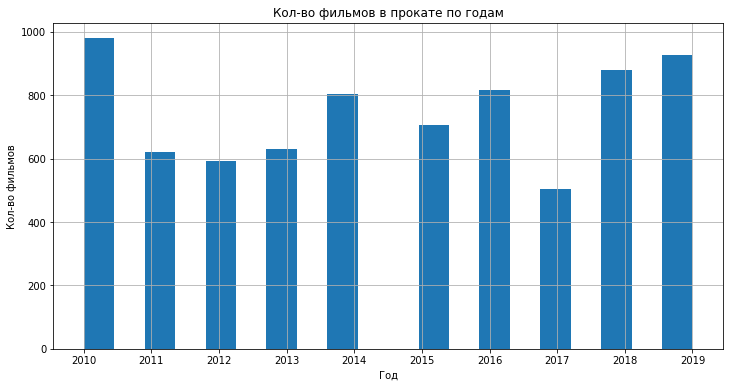

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(movies['show_start_year'], bins = 20)
ax = ax.xaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))
plt.title('Кол-во фильмов в прокате по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во фильмов')
plt.grid()
plt.show()

Видим, что больше всего фильмов выходило в прокат в 2010, 2019 и 2018 годах. Минимальное кол-во наблюдается в 2017 году — вероятно, год забастовки в Голливуде.

**Посмотрим кол-во фильмов, которые выходили в прокат в кинотеатрах, за каждый год**

Создадим таблицу, где будут собраны строки, в которых сборы не равны нулю, т.е. были показаны в кинотеатрах.

In [52]:
show_in_cinema = movies[['show_start_year', 'pu_number', 'box_office']]
show_in_cinema = show_in_cinema.loc[show_in_cinema['box_office'] > 0]
show_in_cinema.head(10)

,show_start_year,pu_number,box_office
6,2013,111007013,2700.0
18,2016,111003616,360.0
19,2016,111003716,420.0
22,2013,111007413,380.0
38,2013,111007213,1165.0
47,2014,111029814,22660.0
50,2015,111005815,84720.0
52,2013,111010513,1795.0
61,2015,111005515,300.0
64,2015,111005915,67500.0


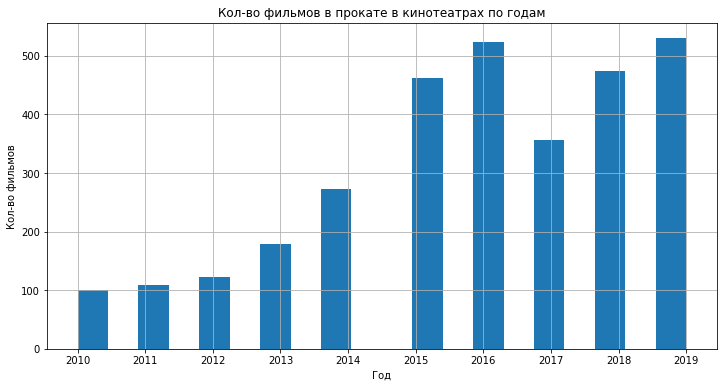

In [53]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(show_in_cinema['show_start_year'], bins = 20)
ax = ax.xaxis.set_major_locator(plt.IndexLocator(base=1, offset=0))
plt.title('Кол-во фильмов в прокате в кинотеатрах по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во фильмов')
plt.grid()
plt.show()

Сравним показатели по прокату в целом и в кинотеатрах:

In [54]:
pivot_show_in_cinema = show_in_cinema.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = 'count')
display(pivot_show_in_cinema)

,box_office
show_start_year,
2010,101
2011,109
2012,122
2013,179
2014,273
2015,462
2016,524
2017,357
2018,474


In [55]:
pivot_show = show_films.merge(pivot_show_in_cinema, on = 'show_start_year', how = 'left')
display(pivot_show)

,show_start_year,pu_number,box_office
0,2010,980,101
1,2011,620,109
2,2012,592,122
3,2013,629,179
4,2014,805,273
5,2015,705,462
6,2016,817,524
7,2017,505,357
8,2018,879,474
9,2019,926,530


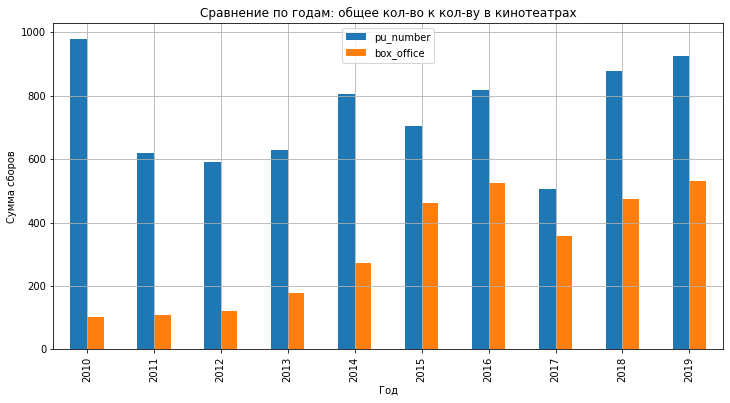

In [56]:
pivot_show.plot(x = 'show_start_year', kind = 'bar', figsize = (12, 6), grid = True, 
    title = 'Сравнение по годам: общее кол-во к кол-ву в кинотеатрах')

plt.xlabel('Год')
plt.ylabel('Сумма сборов')
plt.show()

Меньше всего в прокате в кинотеатрах было фильмов в 2010 году, хотя по кол-ву вышедших в прокат фильмов именно этот год был рекордсменом. Далее идет линейно по нарастающей до 2016 года. Также наблюдаем сильный спад в 2017 году. Далее кол-во фильмов снова растет. Максимумы наблюдаем в 2019, 2016, 2018 и 2015 годах, соответственно.

**Изучим динамику проката по годам на основе таблицы show_in_cinema**

In [57]:
pivot_show_in_cinema = show_in_cinema.pivot_table(
    index = 'show_start_year', 
    values = 'box_office', 
    aggfunc = ['sum', 'count', 'mean'])

display(pivot_show_in_cinema)

,sum,count,mean
,box_office,box_office,box_office
show_start_year,,,
2010,2.428654e+06,101,2.404608e+04
2011,1.410276e+07,109,1.293832e+05
2012,6.911073e+06,122,5.664814e+04
2013,2.979971e+07,179,1.664788e+05
2014,7.444952e+09,273,2.727089e+07
2015,3.949737e+10,462,8.549213e+07
2016,4.786611e+10,524,9.134753e+07
2017,4.856371e+10,357,1.360328e+08


Помотрим, как менялись кассовые сборы по годам:

Text(0, 0.5, 'Кассовые сборы, млрд руб')

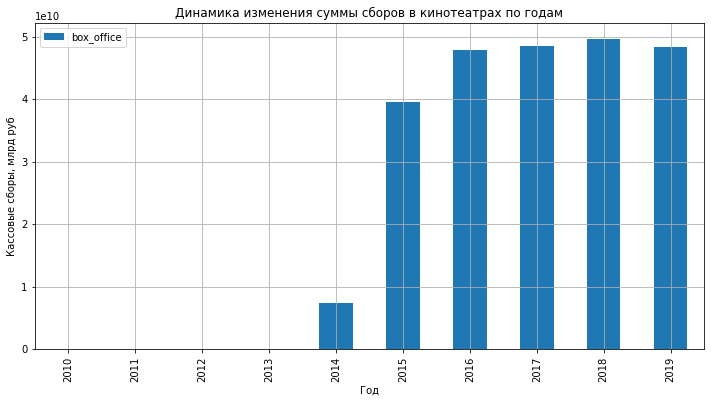

In [58]:
pivot_show_in_cinema['sum'].plot(kind = 'bar', grid = True, figsize = (12,6))
plt.title('Динамика изменения суммы сборов в кинотеатрах по годам')
plt.xlabel('Год')
plt.ylabel('Кассовые сборы, млрд руб')

Несмотря на то, что на графике создается видимость нулевых сборов с 2010 по 2013 год, на самом деле они просто ничтожно малы по сравнению с 2014-2019 годами.

Наблюдаем значительный рост объема кассовых сборов, начиная с 2014 года. По сводной таблице можем определить минимальную сумму сборов — 2,4 млн руб в 2010 году. Максимальная сумма — 201,8 трлн руб в 2018 году.

Стоит отметить, что в 2018 году сведений о кассовых сборах по фильмам (474 фильма) было в 4,5 раза больше, чем в 2010 (105 фильмов). Но рост в объеме кассовых сборов несопоставим с ростом количества фильмов. Это означает, что растёт именно средняя величина кассовых сборов по фильмам.

Однако не ясно, почему с 2010 по 2013 столь низкие показатели. Рассмотрим детальнее эти годы. 

In [59]:
not_enough_money = movies.pivot_table(index = ['title', 'show_start_year'], values = 'box_office', aggfunc = 'sum')
not_enough_money.query('show_start_year == 2010').sort_values(by = 'box_office', ascending = False).head()

,,box_office
title,show_start_year,
морские динозавры 3d: путешествие в доисторический мир,2010,1446400.0
хаббл 3d,2010,245630.0
братья .,2010,168411.0
стоун,2010,54060.0
три богатыря и шамаханская царица,2010,45225.0


Максимальные сборы за 2010 год составляют чуть меньше 1,5 млн, а минимальные 45 тысяч, что выглядит неправдоподобно, т.к. данные в рублях. Смотрим дальше.

In [60]:
not_enough_money.query('show_start_year == 2011').sort_values(by = 'box_office', ascending = False).head()

,,box_office
title,show_start_year,
черные дыры: обратная сторона вселенной,2011,11618085.0
"естественный отбор /по книгам чарльза дарвина ""происхождение видов"" и ""путешествие натуралиста вокруг света на корабле ""бигль""/",2011,860810.0
"райд ""сатурн"" из серии ""космический парк 360""",2011,421940.0
смурфики,2011,106060.0
кунг-фу панда 2,2011,94515.0


Тут максимальная сумма сборов уже больше (чуть больше 11,5 млн), но минимум все еще выглядит странно — меньше 100 тысяч. 

In [61]:
not_enough_money.query('show_start_year == 2012').sort_values(by = 'box_office', ascending = False).head()

,,box_office
title,show_start_year,
мстители,2012,2311220.0
монстры на каникулах,2012,842234.0
ледниковый период 4: континентальный дрейф,2012,609274.0
белоснежка и охотник,2012,470427.0
три богатыря на дальних берегах,2012,351643.0


В 2012 году на максимум приходится почти 2,5 млн, а на минимум почти 352 тысячи рублей.

In [62]:
not_enough_money.query('show_start_year == 2013').sort_values(by = 'box_office', ascending = False).head()

,,box_office
title,show_start_year,
невидимки,2013,19957031.5
великая красота,2013,4321638.0
иван царевич и серый волк 2,2013,1081797.0
что творят мужчины,2013,779027.6
пока еще жива,2013,365353.6


Здесь уже максимум побольше, но все еще не вызывает доверия — почти 20 млн. Минимум же около 365 тысяч рублей. 

Для формирования верных выводов посмотрим на 2014 год.

In [63]:
not_enough_money.query('show_start_year == 2014').sort_values(by = 'box_office', ascending = False).head()

,,box_office
title,show_start_year,
седьмой сын,2014,1.016411e+09
исход: цари и боги,2014,9.702768e+08
пятьдесят оттенков серого /по произведению э.л.джеймс/,2014,9.637288e+08
kingsman: секретная служба,2014,5.669246e+08
ночь в музее: секрет гробницы,2014,4.882237e+08


Здесь уже данные выглядят намного правдоподобнее, цифры приближенные к реальности. 

На этой основе можем сделать вывод, что данные за 2010 год либо некорректно выгружены, либо приведены в другой валюте (например, в долларах).

С помощью сводной таблицы посчитаем среднюю и медианную сумму сборов для каждого года.

In [64]:
mm_box_office = movies.pivot_table(index = 'show_start_year', values = 'box_office', aggfunc = ['mean', 'median'])
display(mm_box_office)

,mean,median
,box_office,box_office
show_start_year,,
2010,2.313004e+04,1700.000
2011,1.293832e+05,3000.000
2012,5.441790e+04,5560.000
2013,1.619549e+05,3522.500
2014,2.668442e+07,18160.000
2015,8.494057e+07,4920933.000
2016,9.117353e+07,3915041.020
2017,1.360328e+08,9968340.000


Text(0, 0.5, 'Сумма сбора')

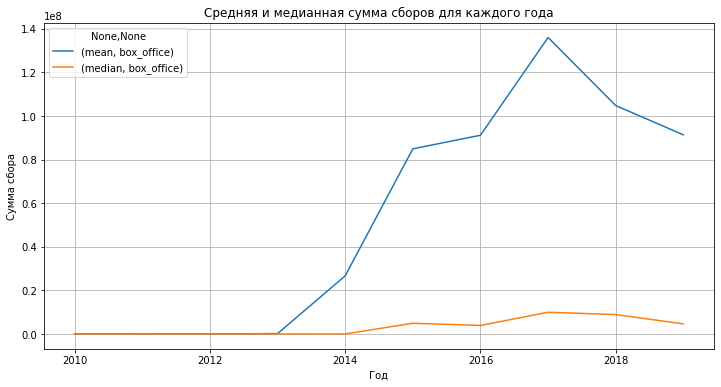

In [65]:
mm_box_office.plot(grid = True, figsize = (12, 6))
plt.title('Cредняя и медианная сумма сборов для каждого года')
plt.xlabel('Год')
plt.ylabel('Сумма сбора')

Можем сделать вывод, что сборы некоторых фильмов значительно отличаются от остальных. Это повлияло на среднее — оно сильно больше медианы. 

Посмотрим, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате за конкретный год. Для начала соберем данные по нужным годам в одной таблице.

In [66]:
age_limit = movies.query('show_start_year > 2014').groupby('age_restriction')['box_office'].sum()

Text(0, 0.5, 'Сумма сборов, млрд')

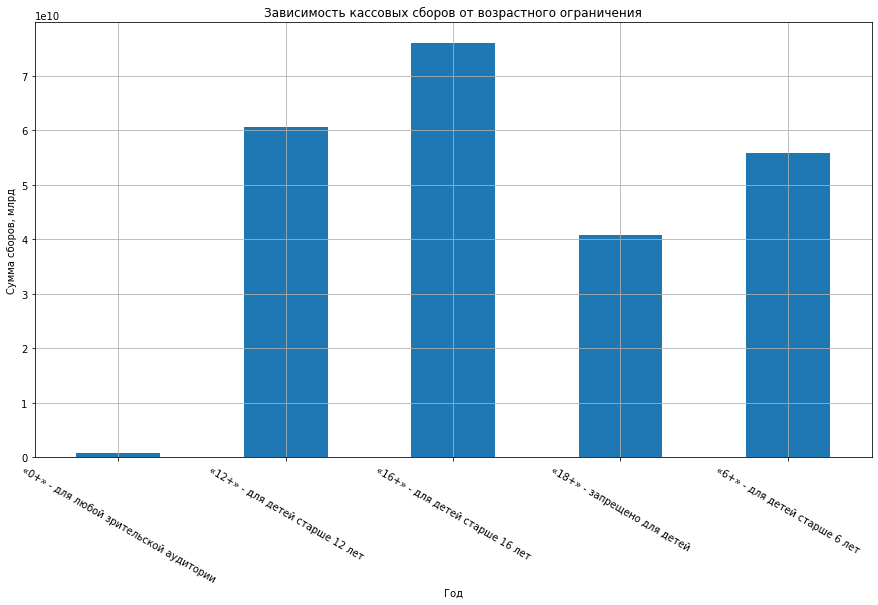

In [67]:
age_limit.plot(x = 'age_restriction', y = 'box_office', kind = 'bar', grid = True, rot = 330, figsize = (15, 8))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('Год')
plt.ylabel('Сумма сборов, млрд')

C 2015 по 2019 годы данные говорят о том, что больше всего собирают фильмы 16+, на втором месте 12+. Меньше всего собирают фильмы 0+. 

Посмотрим на каждый год по отдельности.

Text(0, 0.5, 'Сумма сборов, млрд')

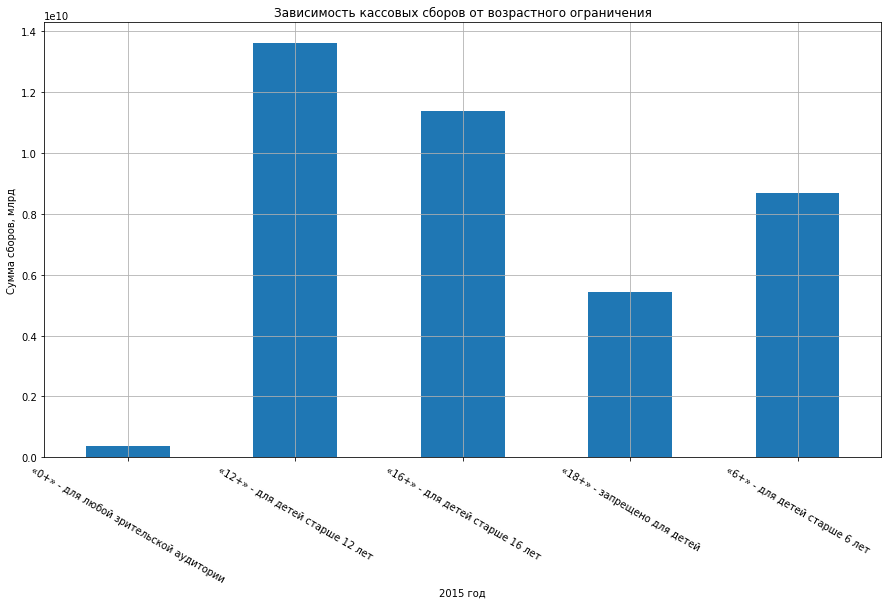

In [68]:
age_limit_2015 = movies.query('show_start_year == 2015').groupby('age_restriction')['box_office'].sum()

age_limit_2015.plot(x = 'age_restriction', y = 'box_office', kind = 'bar', grid = True, rot = 330, figsize = (15, 8))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('2015 год')
plt.ylabel('Сумма сборов, млрд')

Видим, что в 2015 году больше всего собрали фильмы 12+, на втором месте 16+. Минимум все еще показывают фильмы 0+.

Text(0, 0.5, 'Сумма сборов, млрд')

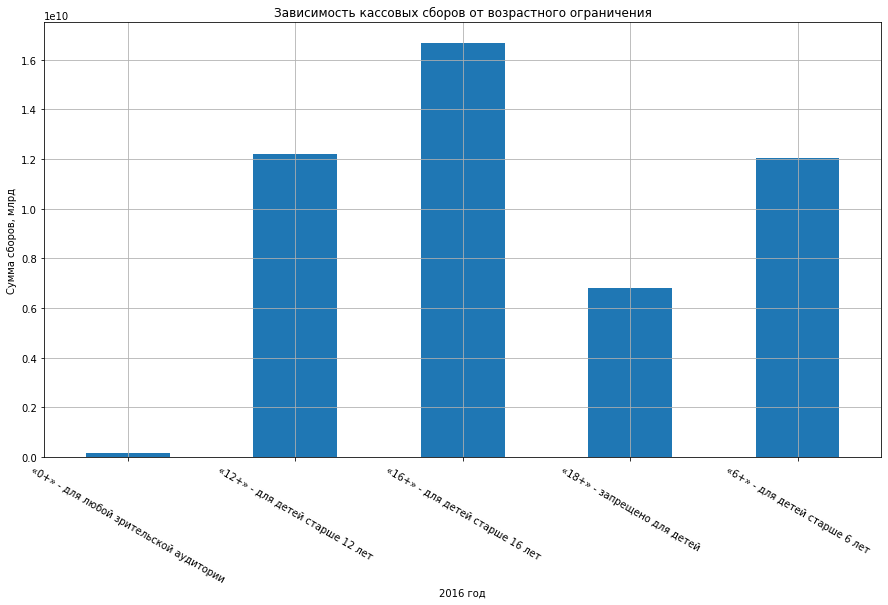

In [69]:
age_limit_2016 = movies.query('show_start_year == 2016').groupby('age_restriction')['box_office'].sum()

age_limit_2016.plot(x = 'age_restriction', y = 'box_office', kind = 'bar', grid = True, rot = 330, figsize = (15, 8))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('2016 год')
plt.ylabel('Сумма сборов, млрд')

В 2016 году лидируют фильмы 16+, на втором месте фильмы 12+ и с минимальным отставанием от них идут фильмы 6+. Минимум все еще у 0+.

Text(0, 0.5, 'Сумма сборов, млрд')

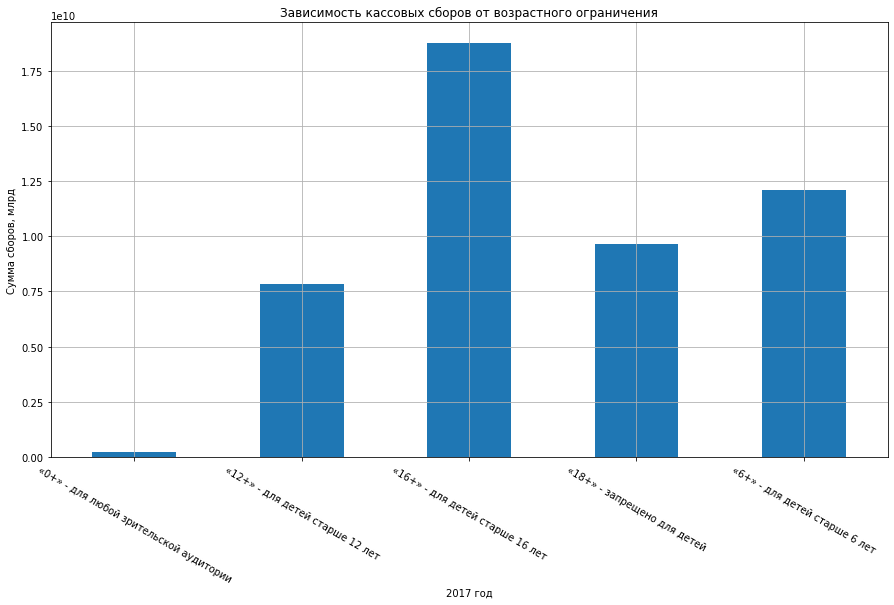

In [70]:
age_limit_2017 = movies.query('show_start_year == 2017').groupby('age_restriction')['box_office'].sum()

age_limit_2017.plot(x = 'age_restriction', y = 'box_office', kind = 'bar', grid = True, rot = 330, figsize = (15, 8))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('2017 год')
plt.ylabel('Сумма сборов, млрд')

С сильным отрывом по сборам лидируют фильмы 16+. Минимум по-прежнему у 0+.

Text(0, 0.5, 'Сумма сборов, млрд')

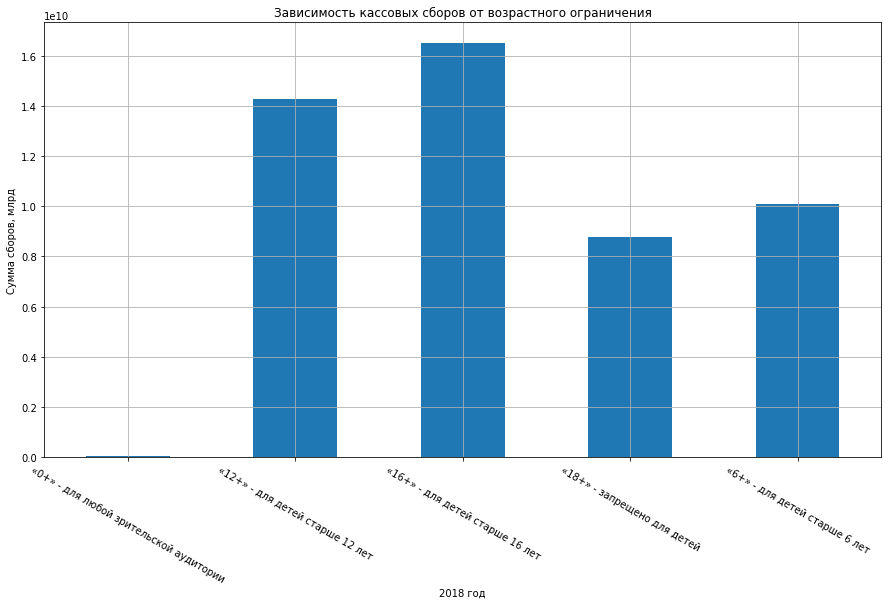

In [71]:
age_limit_2018 = movies.query('show_start_year == 2018').groupby('age_restriction')['box_office'].sum()

age_limit_2018.plot(x = 'age_restriction', y = 'box_office', kind = 'bar', grid = True, rot = 330, figsize = (15, 8))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('2018 год')
plt.ylabel('Сумма сборов, млрд')

Минимум все еще приходится на фильмы 0+, максимума по сборам достигли фильмы 16+. На втором месте фильмы 12+. 

Text(0, 0.5, 'Сумма сборов, млрд')

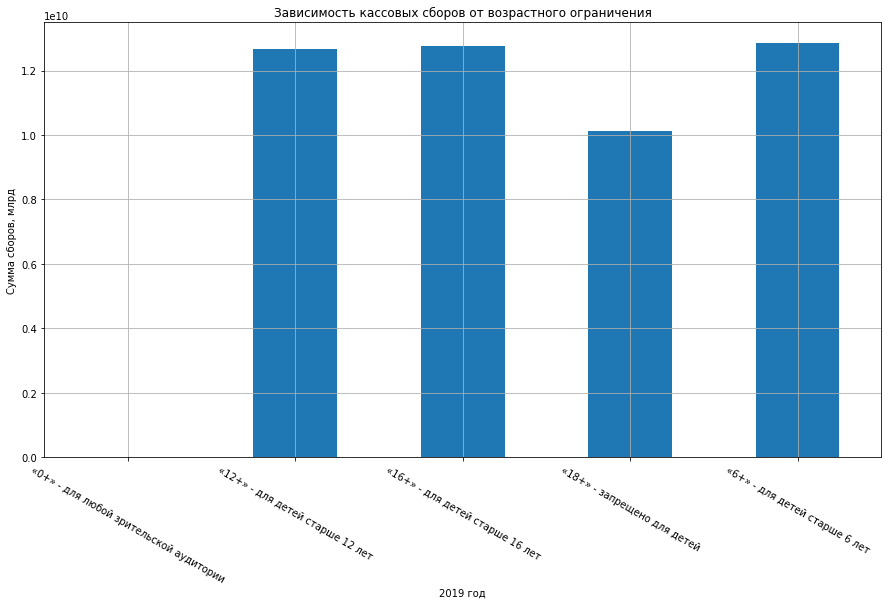

In [72]:
age_limit_2019 = movies.query('show_start_year == 2019').groupby('age_restriction')['box_office'].sum()

age_limit_2019.plot(x = 'age_restriction', y = 'box_office', kind = 'bar', grid = True, rot = 330, figsize = (15, 8))
plt.title('Зависимость кассовых сборов от возрастного ограничения')
plt.xlabel('2019 год')
plt.ylabel('Сумма сборов, млрд')

В 2019 году практически равные сборы и достаточно высокие сборы принесли фильмы 16+, 6+ и 12+. Минимум все еще у 0+.

**Вывод**

За период с 2015 по 2019 год наибольшую сумму кассовых сборов собрали фильмы категории 16+, далее идут фильмы категорий 12+ и 6+, затем идут фильмы категории 18+, а фильмы категории 0+ принесли меньше всего выручки. 

Анализ сборов отдельно по годам показал следующее:

— в 2015 году больше всего собрали фильмы 12+, на втором месте 16+. Минимум показывают фильмы 0+;
— в 2016 году лидируют фильмы 16+, на втором месте фильмы 12+ и с минимальным отставанием от них идут фильмы 6+. Минимум у 0+;
— в 2017 году с сильным отрывом по сборам лидируют фильмы 16+. Минимум у 0+;
— в 2018 году минимум приходится на фильмы 0+, максимума по сборам достигли фильмы 16+. На втором месте фильмы 12+;
— в 2019 году практически равные и достаточно высокие сборы принесли фильмы 16+, 6+ и 12+. Минимум у 0+.

На основе проверенных данных можем сказать, что действительно есть зависимость между возрастной категорией и размером кассовых сборов. Вероятно, непопулярность фильмов 0+ обусловлена малой целевой аудиторией. Также небольшую популярность имеют фильмы категории 18+ — они почти всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии это несовершеннолетняя молодежь.

## Исследование фильмов, которые получили государственную поддержку

Чтобы получить полную картину о популярности, окупаемости и аудитории относительно фильмов с госудраственной поддержкой, проведем исследование по таким картинам, исходя из данных нашего датафрейма. Для этого создадим отдельную таблицу с выборкой таких фильмов. 

In [73]:
films_with_support = movies[movies['refundable_support'].notna() | movies['nonrefundable_support'].notna()]
films_with_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7477
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

Получилась вполне правдоподобная таблица практически без пропусков (имеющиеся заполнять не вижу смысла, т.к. они составляют ничтожно малую долю от общего массива данных).

Добавим также столбец с общей суммой государственного финансирования — возвратного и невозвратного бюджета. 

In [74]:
films_with_support['all_support'] = films_with_support['nonrefundable_support'] + films_with_support['refundable_support']

/tmp/ipykernel_97/2823057520.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_with_support['all_support'] = films_with_support['nonrefundable_support'] + films_with_support['refundable_support']


In [75]:
films_with_support.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 332 entries, 1281 to 7477
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   title                  332 non-null    object             
 1   pu_number              332 non-null    int64              
 2   show_start_date        332 non-null    datetime64[ns, UTC]
 3   type                   332 non-null    object             
 4   film_studio            332 non-null    object             
 5   production_country     332 non-null    object             
 6   director               332 non-null    object             
 7   producer               330 non-null    object             
 8   age_restriction        332 non-null    object             
 9   refundable_support     332 non-null    float64            
 10  nonrefundable_support  332 non-null    float64            
 11  budget                 332 non-null    float64        

Посмотрим по годам, как менялось кол-во фильмов с государственной поддержкой.

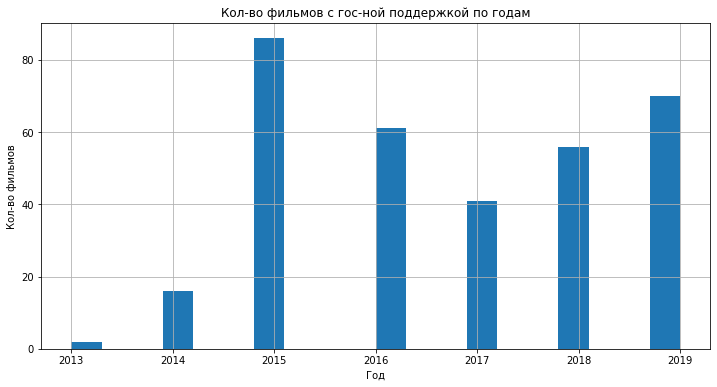

In [76]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(films_with_support['show_start_year'], bins = 20)
ax = ax.xaxis.set_major_locator(plt.IndexLocator(base = 1, offset = 0))
plt.title('Кол-во фильмов с гос-ной поддержкой по годам')
plt.xlabel('Год')
plt.ylabel('Кол-во фильмов')
plt.grid()
plt.show()

Видим, что объемы гос-поддержки начали расти с 2014 года. Максимум наблюдаем в 2015 и 2019 годах. Основываясь на личном опыте, могу судить, что это может быть связано с политической обстановкой в стране. Минимум наблюдаем в 2017 году, когда, исходя из ранее сделанных наблюдений, в принципе был спад производства в киноиндустрии. 

Посмотрим, какие при этом жарны поддерживались гос-вом больше всего на протяжении данного периода. 

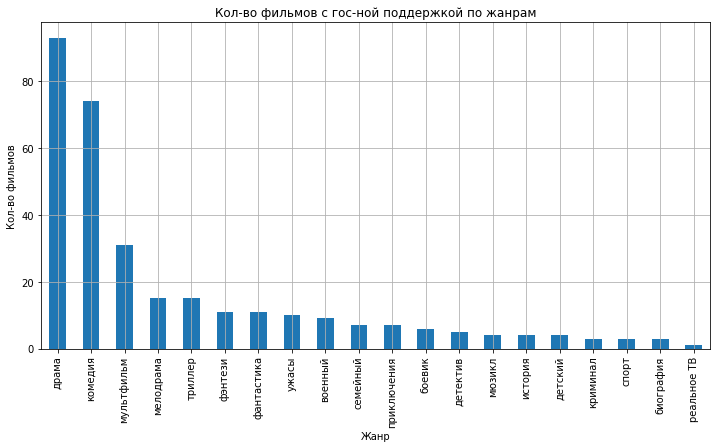

In [77]:
films_with_support['main_genres'].value_counts().plot(kind = 'bar', figsize = (12, 6))
plt.title('Кол-во фильмов с гос-ной поддержкой по жанрам')
plt.xlabel('Жанр')
plt.ylabel('Кол-во фильмов')
plt.grid()
plt.show()

Видим, что чаще всего деньги от гос-ва выделялись на поддержку драм, комедий и мультфильмов. 

Посмотрим, зависит ли финансирование от рентабельности жанра фильма, т.е. поддерживаются ли гос-вом те фильмы, которые приносят больше прибыли и лучше окупаются. Добавим столбец с маржинальностью, где коэффициент больше 1 говорит о том, что фильм окупил свою стоимость.

In [78]:
films_with_support['profit_margin'] = (films_with_support['box_office'] / films_with_support['budget'])
films_with_support['profit_margin'].describe()

/tmp/ipykernel_97/929641751.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_with_support['profit_margin'] = (films_with_support['box_office'] / films_with_support['budget'])


count    318.000000
mean       0.825824
std        1.687637
min        0.000017
25%        0.023373
50%        0.176420
75%        0.968960
max       19.209804
Name: profit_margin, dtype: float64

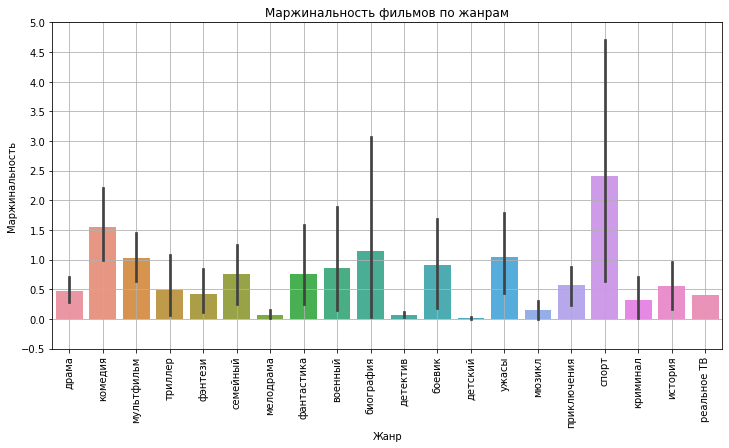

In [79]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'main_genres', y = 'profit_margin', data = films_with_support)
#films_with_support['main_genres'].plot(kind = 'bar', stacked = True, y = 'profit_margin', figsize = (12, 6))
plt.title('Маржинальность фильмов по жанрам')
plt.xlabel('Жанр')
plt.xticks(rotation = 90)
plt.yticks([-0.5, 0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.ylabel('Маржинальность')
plt.grid()
plt.show()

Видим, что наиболее маржинальными являются комедии, мультфильмы и фильмы в жанре спорт. Из этих трех жанров лишь мультфильмы входят в топ по финансированию государством. 

Посмотрим на кол-во фильмов с гос-ной поддержкой и их маржинальность по возрастному ограничению.

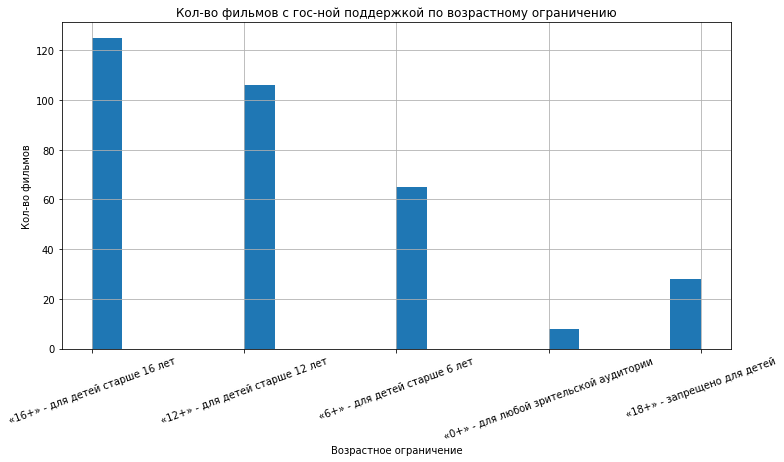

In [80]:
fig, ax = plt.subplots(figsize=(12,6))
ax.hist(films_with_support['age_restriction'], bins = 20)
ax = ax.xaxis.set_major_locator(plt.IndexLocator(base = 1, offset = 0))
plt.title('Кол-во фильмов с гос-ной поддержкой по возрастному ограничению')
plt.xlabel('Возрастное ограничение')
plt.ylabel('Кол-во фильмов')
plt.xticks(rotation = 20)
plt.grid()
plt.show()

Видим, что чаще всего поддерживаются гос-вом фильмы 16+ и 12+. 

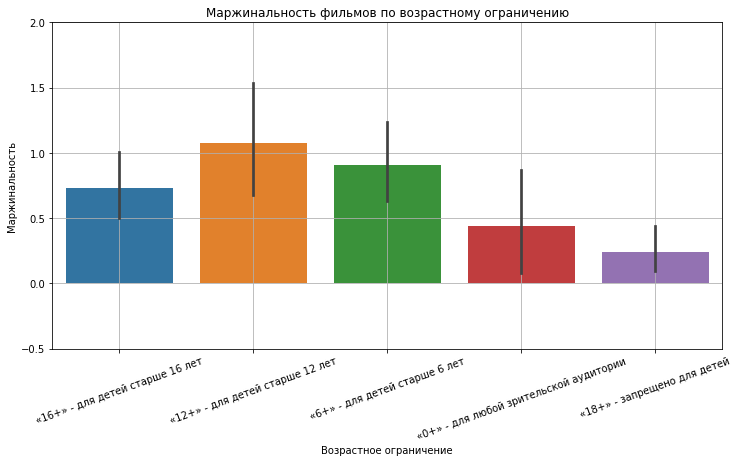

In [81]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'age_restriction', y = 'profit_margin', data = films_with_support)
plt.title('Маржинальность фильмов по возрастному ограничению')
plt.xlabel('Возрастное ограничение')
plt.xticks(rotation = 20)
plt.yticks([-0.5, 0, 0.5, 1.0, 1.5, 2.0])
plt.ylabel('Маржинальность')
plt.grid()
plt.show()

Видим, что наибольшей маржинальностью при этом обладает категория 12+, на втором месте 6+.

Проверим, окупались ли фильмы с гос-ной поддержкой, т.е. превышают ли сборы фильмов с гос-ной поддержкой их бюджет.

In [82]:
pivot_margin = films_with_support.pivot_table(
    index = 'show_start_year', values = ['budget', 'box_office'], aggfunc = 'sum').reset_index()



Можем сделать вывод, что за весь период не наблюдалось окупаемости фильмов, финансируемых гос-вом.

Посмотрим на кол-во окупившихся и не окупившихся фильмов по жанрам. Для этого добавим новый столбец в общую таблицу с фильмами с гос-ной поддержкой.

In [83]:
films_with_support['payback'] = films_with_support['box_office'] - films_with_support['budget']
films_with_support.head()

/tmp/ipykernel_97/954001480.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  films_with_support['payback'] = films_with_support['box_office'] - films_with_support['budget']


,title,pu_number,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,...,ratings,genres,box_office,show_start_year,main_director,main_genres,share_of_support,all_support,profit_margin,payback
1281,пока еще жива,111005313,2013-10-11 12:00:00+00:00,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.0,...,8.1,"драма,мелодрама",365353.6,2013,А.Атанесян,драма,0.33,26500000.0,0.004601,-79046546.4
1448,бесславные придурки,111003314,2014-03-28 12:00:00+00:00,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.0,...,NaN,NaN,28140.0,2014,А.Якимчук,NaN,0.70,26000000.0,0.000758,-37114717.0
1498,невидимки,111004213,2013-09-10 12:00:00+00:00,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.0,...,5.3,"комедия,фантастика",19957031.5,2013,Р.Давлетьяров,комедия,0.61,107847945.0,0.113377,-156066458.5
1524,берцы,111004314,2014-05-05 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.0,...,4.2,драма,55917.5,2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,0.69,28000000.0,0.001378,-40518222.5
1792,братья ч,111004414,2014-04-23 12:00:00+00:00,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.0,...,6.4,драма,232100.0,2014,М.Угаров,драма,0.62,25000000.0,0.005800,-39783022.0


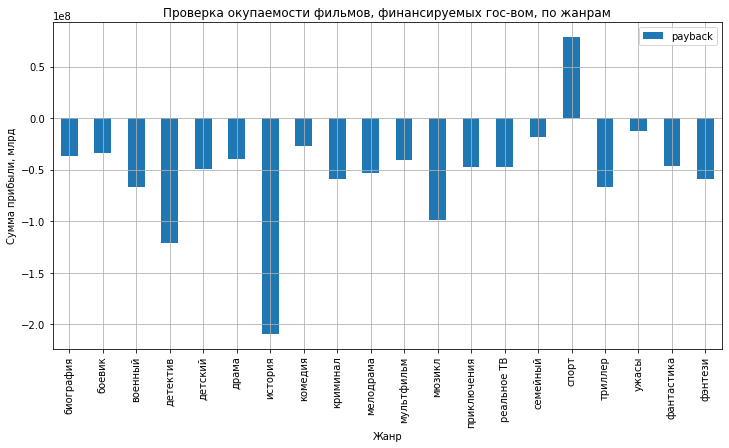

In [84]:
pivot_payback = films_with_support.pivot_table(
    index = 'main_genres', values = 'payback', aggfunc = 'median').reset_index()

pivot_payback.plot(
    x = 'main_genres', y = 'payback', kind = 'bar', stacked=True, figsize = (12, 6), grid = True)
plt.title('Проверка окупаемости фильмов, финансируемых гос-вом, по жанрам')
plt.xlabel('Жанр')
plt.xticks(rotation = 90)
plt.ylabel('Сумма прибыли, млрд')
plt.show()

Видим, что только фильмы в жанре спрот окупаются, если смотреть данные по медиане. Посмотрим, сколько в общей таблице по гос-ной поддержке таких фильмов, чтобы проверить суждение о жанре спорт.

In [85]:
print('Всего за период с 2010 по 2019 год гос-вом поддерживалось',
      films_with_support[films_with_support['main_genres'] == 'спорт']['main_genres'].count(), 
      'фильма в жанре спорт.')

Всего за период с 2010 по 2019 год гос-вом поддерживалось 3 фильма в жанре спорт.


Таким образом окупаемость жанра спорт нельзя считать совершенно верным утверждением, т.к. для анализа у нас есть всего 3 фильма. Если же судить по самым многочисленным категориям — драма, комедия, мультфильм — ни одна из них не окупается, но ближе всего к нулевому значению комедия, мультфильмы и драмы примерно на одном уровне.

Посмотрим, какой рейтинг получали фильмы с гос-ной поддержкой в течение заданого периода. Таким образом увидим отношение аудитории к картинам.

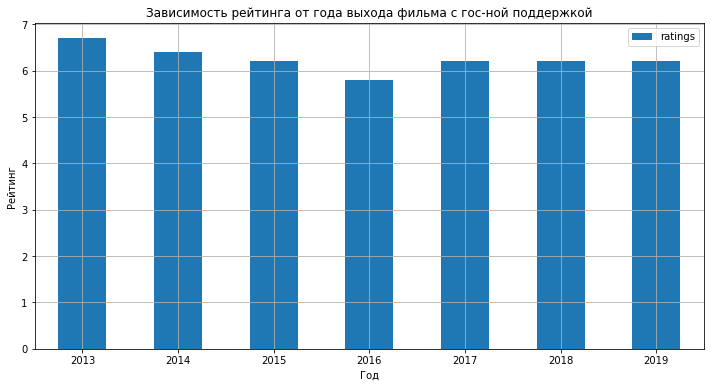

In [86]:
pivot_ratings = films_with_support.pivot_table(
    index = 'show_start_year', values = 'ratings', aggfunc = 'median').reset_index()

pivot_ratings.plot(
    x = 'show_start_year', y = 'ratings', kind = 'bar', stacked=True, figsize = (12, 6), grid = True)
plt.title('Зависимость рейтинга от года выхода фильма с гос-ной поддержкой')
plt.xlabel('Год')
plt.xticks(rotation = 0)
plt.ylabel('Рейтинг')
plt.show()

Видим, что с 2013 года медиана рейтинга фильмов с гос-ной поддержкой начал падать, минимум наблюдаем в 2016 году. Далее медиана рейтинга выросла до значения 2015 года и оставалась стабильной до конца анализируемого периода. 

**Вывод**

Объемы гос-поддержки начали расти с 2014 года. Максимум наблюдаем в 2015 и 2019 годах. Основываясь на личном опыте, могу судить, что это может быть связано с политической обстановкой в стране. Минимум наблюдаем в 2017 году, когда, исходя из ранее сделанных наблюдений, в принципе был спад производства в киноиндустрии.

Чаще всего деньги от гос-ва выделялись на поддержку драм, комедий и мультфильмов. Наиболее маржинальными являются комедии, мультфильмы и фильмы в жанре спорт. Из этих трех жанров лишь мультфильмы входят в топ по финансированию государством.

Чаще всего поддерживаются гос-вом фильмы с возрастным ограничением 16+ и 12+. Наибольшей маржинальностью при этом обладает категория 12+, на втором месте 6+.

Важно отметить, что за весь период не наблюдалось окупаемости фильмов, финансируемых гос-вом. Только фильмы в жанре спрот окупаются, если смотреть данные по медиане. Посмотрим, сколько в общей таблице по гос-ной поддержке таких фильмов, чтобы проверить суждение о жанре спорт. Т.к. всего за период с 2010 по 2019 год гос-вом поддерживалось 3 фильма в жанре спорт, можем сделать вывод, что окупаемость жанра спорт нельзя считать совершенно верным утверждением, т.к. для анализа у нас есть всего 3 фильма. Если же судить по самым многочисленным категориям — драма, комедия, мультфильм — ни одна из них не окупается, но ближе всего к нулевому значению комедия, мультфильмы и драмы примерно на одном уровне.

С 2013 года медиана рейтинга фильмов с гос-ной поддержкой начал падать, минимум наблюдаем в 2016 году. Далее медиана рейтинга выросла до значения 2015 года и оставалась стабильной до конца анализируемого периода.

## Общий вывод


Заказчиком данного исследования является Министерство культуры Российской Федерации. 

Задача исследования состояла в том, чтобы изучить рынок российского кинопроката и выявить текущие тренды. 

Исследование проводилось на датафрейме, в котором есть фильмы, которые получили государственную поддержку. **Необходимо было ответить на вопрос — насколько фильмы с гос-поддержкой интересны зрителю**. Данные, с которыми предстояло работать, опубликованы на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

В сборном обработанном датафреме содержатся такие данные:

<br>**title** — название фильма;
<br>**puNumber** — номер прокатного удостоверения;
<br>**show_start_date** — дата премьеры фильма;
<br>**type** — тип фильма;
<br>**film_studio** — студия-производитель;
<br>**production_country** — страна-производитель;
<br>**director** — режиссёр;
<br>**producer** — продюсер;
<br>**age_restriction** — возрастная категория;
<br>**refundable_support** — объём возвратных средств государственной поддержки;
<br>**nonrefundable_support** — объём невозвратных средств государственной поддержки;
<br>**financing_source** — источник государственного финансирования;
<br>**budget** — общий бюджет фильма;
<br>**ratings** — рейтинг фильма на КиноПоиске;
<br>**genres** — жанр фильма;
<br>**puNumber** — номер прокатного удостоверения;
<br>**box_office** — сборы в рублях.


Датафрейм содержит информацию из реестра прокатных удостоверений. У одного фильма может быть несколько прокатных удостоверений. Столбец budget уже включает в себя полный объём государственной поддержки. 

**В ходе предобработки** данных были изменены типы данных в столбцах с номерами прокатных удостоверений, датами премьеры фильма и рейтингом фильма.

Удалось избавиться от пропусков методом удаления строк в столбцах: студия-производитель, страна-производитель, режиссер. Причиной для удаления данных пропусков послужило их небольшое кол-во (менее 1% от общего массива данных). Остальные пропуски остались как есть, т.к. их либо невозможно заполнить, располагая лишь имеющимися данными, либо некорректно будет заполнить на основе имеющихся данных. Удаление строк было невозможно по причине того, что их большое кол-во, мы рисковали потерять слишком много данных.

Полных дубликатов в датафрейме не обнаружилось. Удалось избавиться от дубликатов по номеру прокатного удостоверения — дублировались лишь номера, поэтому строки удалось сохранить для анализа методом замены номера на отсутствующий в таблице.

Общая проблема, встречающаяся почти во всех категориальных столбцах — лишние пробелы в начале и конце строки. Она была исправлена в ходе работы.

Удалось исправить данные в столбцах с рейтингом — они были приведены в числовой формат и в вид, привычной десятичной дроби по аналогии с рейтингом на КиноПоиске. Удалось также выяснить, что 24-м фильмам с неизвестными объемами сборов не предоставлялась государственная поддержка. Также на данном этапе удалось заполнить часть пропуков в бюджете. Т.к. при наличии данных о вложении денег в фильм его бюджет априори не может быть равным нулю, заполнили нулевые значения в бюджете в выявленных 17 строках суммой возвратных и невозвратных средств от государства.

**Добавили новые столбцы**: год выхода фильма в прокат, главного режиссера и основной жанр. Также был создан столбец, отражающий долю гос-ной поддержки от общего бюджета фильма. На основе числового описания данных значений этого столбца можем утверждать следующее:

<br>— в среднем у тех фильмов, которое гос-во поддерживает, доля гос-ных финансов чуть больше половины бюджета (54%);
<br>— всего из имеющихся данных у нас 332 фильма, которым оказывалась гос-ная поддержка;
<br>— есть также и фильмы, бюджет которых полностью состоит из гос-ных денег.

**В ходе исследовательского анализа данных выяснили, что:** за период с 2015 по 2019 год наибольшую сумму кассовых сборов собрали фильмы категории 16+, далее идут фильмы категорий 12+ и 6+, затем идут фильмы категории 18+, а фильмы категории 0+ принесли меньше всего выручки.

Анализ сборов отдельно по годам показал следующее:

— в 2015 году больше всего собрали фильмы 12+, на втором месте 16+. Минимум показывают фильмы 0+; — в 2016 году лидируют фильмы 16+, на втором месте фильмы 12+ и с минимальным отставанием от них идут фильмы 6+. Минимум у 0+; — в 2017 году с сильным отрывом по сборам лидируют фильмы 16+. Минимум у 0+; — в 2018 году минимум приходится на фильмы 0+, максимума по сборам достигли фильмы 16+. На втором месте фильмы 12+; — в 2019 году практически равные и достаточно высокие сборы принесли фильмы 16+, 6+ и 12+. Минимум у 0+.

На основе проверенных данных можем сказать, что действительно есть зависимость между возрастной категорией и размером кассовых сборов. Вероятно, непопулярность фильмов 0+ обусловлена малой целевой аудиторией. Также небольшую популярность имеют фильмы категории 18+ — они почти всегда приносят меньше сборов, чем фильмы категорий 6+/12+/16+. Это, вероятно, связано с тем, что их смотрят только совершеннолетние люди, а на фильмы категорий 6+/12+/16+ родители приходят вместе с детьми, или возможно связано с тем, что основной потребитель киноиндустрии это несовершеннолетняя молодежь.

**В результате исследования информации о фильмах, которые получили государственную поддержку, удалось выяснить**, что объемы гос-поддержки начали расти с 2014 года. Максимум наблюдаем в 2015 и 2019 годах. Основываясь на личном опыте, могу судить, что это может быть связано с политической обстановкой в стране. Минимум наблюдаем в 2017 году, когда, исходя из ранее сделанных наблюдений, в принципе был спад производства в киноиндустрии.

Чаще всего деньги от гос-ва выделялись на поддержку драм, комедий и мультфильмов. Наиболее маржинальными являются комедии, мультфильмы и фильмы в жанре спорт. Из этих трех жанров лишь мультфильмы входят в топ по финансированию государством.

Чаще всего поддерживаются гос-вом фильмы с возрастным ограничением 16+ и 12+. Наибольшей маржинальностью при этом обладает категория 12+, на втором месте 6+.

Важно отметить, что за весь период не наблюдалось окупаемости фильмов, финансируемых гос-вом. Только фильмы в жанре спрот окупаются, если смотреть данные по медиане. Посмотрим, сколько в общей таблице по гос-ной поддержке таких фильмов, чтобы проверить суждение о жанре спорт. Т.к. всего за период с 2010 по 2019 год гос-вом поддерживалось 3 фильма в жанре спорт, можем сделать вывод, что окупаемость жанра спорт нельзя считать совершенно верным утверждением, т.к. для анализа у нас есть всего 3 фильма. Если же судить по самым многочисленным категориям — драма, комедия, мультфильм — ни одна из них не окупается, но ближе всего к нулевому значению комедия, мультфильмы и драмы примерно на одном уровне.

С 2013 года медиана рейтинга фильмов с гос-ной поддержкой начал падать, минимум наблюдаем в 2016 году. Далее медиана рейтинга выросла до значения 2015 года и оставалась стабильной до конца анализируемого периода.